# 깊은 다층 퍼셉트론 신경망 모델을 이용한 예측 모델 

#### 0 사용할 패키지 불러오기 

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random

#### 1. 데이터셋 생성하기

In [2]:
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

#### 2. 모델 구성하기
* Dense 레이어가 총 세 개인 다층퍼셉트론 모델
* 첫 번째, 두 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류역전파가 용이한 relu 활성화 함수를 사용
* 출력 레이어인 세 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수를 사용하지 않음

In [3]:
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


#### 3. 모델 학습과정 설정하기

In [4]:
model.compile(optimizer='rmsprop', loss='mse')

#### 4. 모델 학습시키기

In [5]:
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

Train on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 1s 563us/sample - loss: 1.1746
Epoch 2/50
1000/1000 [==============================] - 0s 31us/sample - loss: 0.3931
Epoch 3/50
1000/1000 [==============================] - 0s 31us/sample - loss: 0.0818
Epoch 4/50
1000/1000 [==============================] - 0s 30us/sample - loss: 0.0357
Epoch 5/50
1000/1000 [==============================] - 0s 30us/sample - loss: 0.0229
Epoch 6/50
1000/1000 [==============================] - 0s 30us/sample - loss: 0.0128
Epoch 7/50
1000/1000 [==============================] - 0s 30us/sample - loss: 0.0096
Epoch 8/50
1000/1000 [==============================] - 0s 29us/sample - loss: 0.0097
Epoch 9/50
1000/1000 [==============================] - 0s 29us/sample - loss: 0.0099
Epoch 10/50
1000/1000 [==============================] - 0s 29us/sample - loss: 0.0092
Epoch 11/50
1000/1000 [==============================] - 0s 29us/sample - loss: 0.0093
Epoch 12/50
1000/1000 [======

#### 5. 학습과정 살펴보기

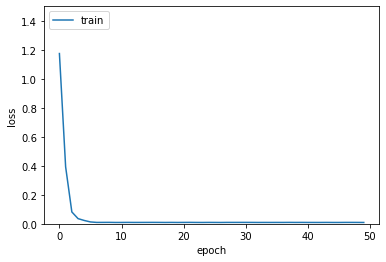

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#### 6. 모델 평가하기

In [8]:
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

100/100 [==============================] - 0s 518us/sample - loss: 0.0153
loss : 0.015257886350154877
